In [1]:
import googletrans

import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from diffusers import StableDiffusionPipeline

# Translate

In [11]:
original = "친구와 역에서 만나기로 했다."

In [12]:
#### translate korean to english
translator = googletrans.Translator()
outStr = translator.translate(original, dest = 'en', src = 'auto')
print(f"{original} => {outStr.text}")

친구와 역에서 만나기로 했다. => I decided to meet with a friend.


# MS Promptist

In [4]:
def load_prompter():
    prompter_model = AutoModelForCausalLM.from_pretrained("weights/ms-promptist")
    tokenizer = AutoTokenizer.from_pretrained("weights/gpt2")
    tokenizer.pad_token = tokenizer.eos_token
    tokenizer.padding_side = "left"
    return prompter_model, tokenizer

prompter_model, prompter_tokenizer = load_prompter()

In [5]:
def generate(plain_text):
    input_ids = prompter_tokenizer(plain_text.strip()+" Rephrase:", return_tensors="pt").input_ids
    eos_id = prompter_tokenizer.eos_token_id
    outputs = prompter_model.generate(input_ids, do_sample=False, max_new_tokens=75, num_beams=8, num_return_sequences=8, eos_token_id=eos_id, pad_token_id=eos_id, length_penalty=-1.0)
    output_texts = prompter_tokenizer.batch_decode(outputs, skip_special_tokens=True)
    res = output_texts[0].replace(plain_text+" Rephrase:", "").strip()
    return res

In [17]:
prompt = generate(outStr.text)

In [21]:
prompt = 'meet with a friend at station, Pixar colored lineart in the style of WLOP and Atey Ghailan'

In [18]:
prompt

'meet with a friend at station, Pixar colored lineart in the style of WLOP and Atey Ghailan'

# Diffusion

In [19]:
def load_diffusion(prompt):
    model_id = "weights/prompthero-openjourney"
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe = pipe.to("cuda")
    image = pipe(prompt).images[0]
    
    return image

In [20]:
image = load_diffusion(prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

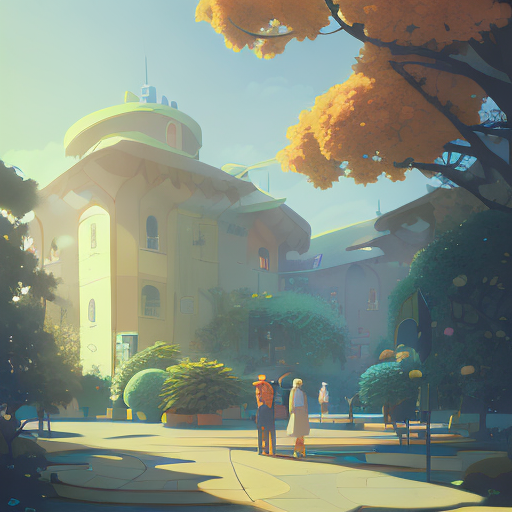

In [22]:
image